# WetGrass analyzed using PyMC3. Learning parameters (transition prob matrices of latent nodes) using Monte Carlo


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm3
import pymc3.data as pm3d
import scipy.stats as stats
import pprint as pp

np.random.seed(1234)
# plt.style.use('ggplot')

# plots don't show on notebook unless use this
%matplotlib inline

In [2]:
import os
import sys
cur_dir_path = os.getcwd()
print(cur_dir_path)
os.chdir('../../')
qfog_path = os.getcwd()
print(qfog_path)
sys.path.insert(0,qfog_path)

/home/jupyter/Notebooks/Quantum/quantum-fog/jupyter-notebooks/inference_via_ext_software
/home/jupyter/Notebooks/Quantum/quantum-fog


In [3]:
import importlib
mm = importlib.import_module("jupyter-notebooks.inference_via_ext_software.ModelMaker_PyMC3")
from graphs.BayesNet import *

In [4]:
# build BayesNet object bnet from bif file
in_path = "examples_cbnets/WetGrass.bif"
bnet = BayesNet.read_bif(in_path, False)

In [5]:
# Generate data from bnet, using qfog native functions
from learning.RandGen_NetParams import *
np.random.seed(1234)
is_quantum = False
data_size = 100
use_int_sts = True
csv_file = 'learning/training_data_c/WetGrass1.csv'

gen = RandGen_NetParams(is_quantum, bnet, data_size, use_int_sts)
gen.write_csv(csv_file)
data = pd.read_csv(csv_file)
data.head()

,Cloudy,Rain,Sprinkler,WetGrass
0,0,1,1,1
1,1,0,0,0
2,1,1,0,1
3,1,1,0,1
4,1,0,1,1


In [6]:
# build model (with observed Cloudy and WetGrass) from bnet
prefix0 = "jupyter-notebooks/" +\
        "inference_via_ext_software/model_examples_c/"
file_prefix = prefix0 + "WetGrass_par_obs_CW"
obs_vertices = ['Cloudy', "WetGrass"]
# Will go out of bounds if propo_scale too big.
# Chain of probabilities in [0, 1] so choose propo_scale << 1
mod_file = mm.ModelMaker_PyMC3.write_model_for_param_learning(file_prefix, bnet, obs_vertices)

.py file with model can be found here

<a href="model_examples_c/WetGrass_par_obs_CW_pymc3.py">
model_examples_c/WetGrass_par_obs_CW_pymc3.py</a>

In [7]:
# enter observed data here
data_Cloudy = data['Cloudy']
data_WetGrass = data['WetGrass']

In [8]:
# -i option allows it to access notebook's namespace

# The variable 'sam_size' (sample size of observed nodes) is used
# without value in the .py file and must be set to an int before
# running the .py file.

sam_size = data_size
%run -i $mod_file

In [9]:
# sample model
chain_length = 20

with mod:      
    trace = pm3.sample(chain_length)
    print(trace)

Assigned NUTS to probs_Rain_stickbreaking__
Assigned BinaryGibbsMetropolis to Rain
Assigned NUTS to probs_Sprinkler_stickbreaking__
Assigned BinaryGibbsMetropolis to Sprinkler
100%|██████████| 520/520 [01:14<00:00,  7.45it/s]/opt/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:418: UserWarning: Chain 0 contains only 20 samples.
  % (self._chain_id, n))



<MultiTrace: 1 chains, 20 iterations, 6 variables>


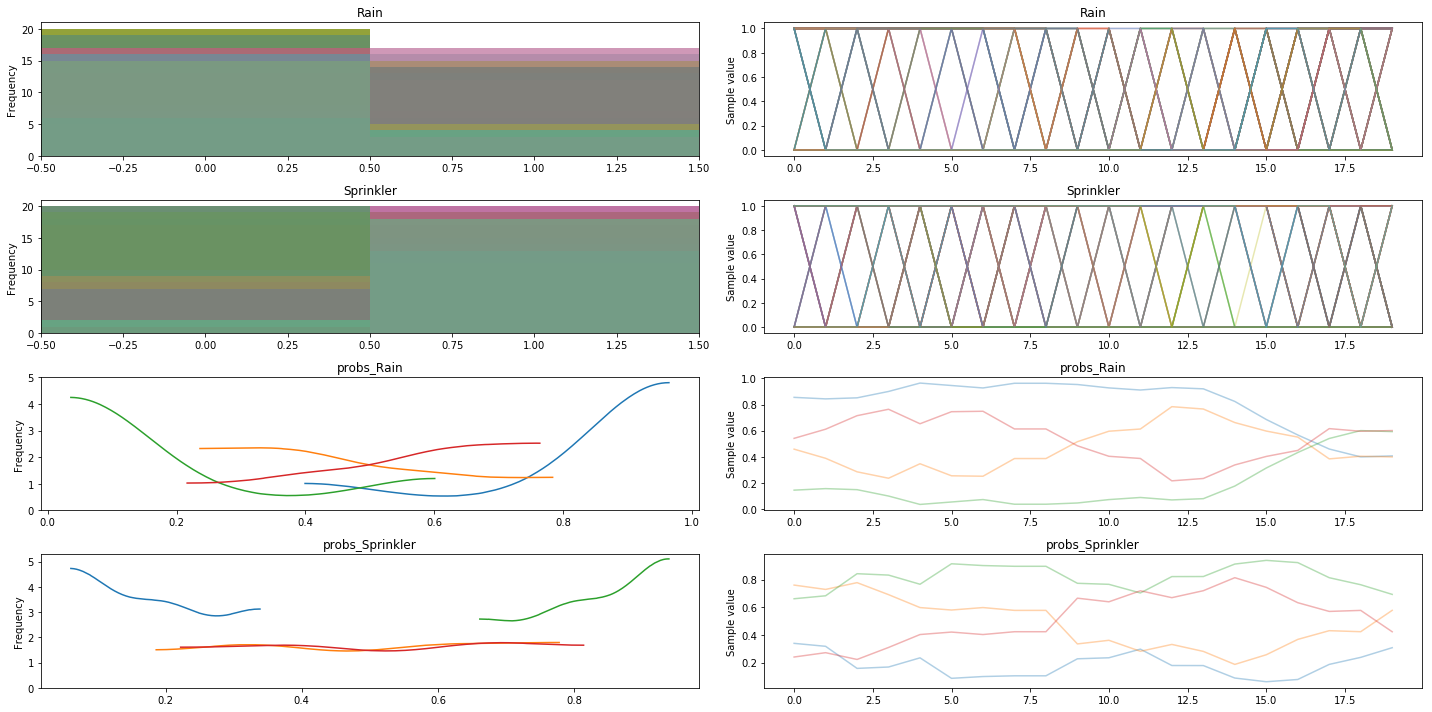

In [10]:
pm3.traceplot(trace,figsize=(20,10));